In [6]:
import porespy as ps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
from skimage.segmentation import find_boundaries
from skimage import exposure, io, measure
from skimage import color, io
from skimage import morphology
from skimage import measure
from skimage.measure import regionprops, regionprops_table
from IPython.display import clear_output
from collections import Counter

In [2]:
linefile = "/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/20190404_E1/line_cc.nii.gz"
semantic = "/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/PNAS/20190404_E1_mGFP_CardiacRegion_0.5_ZYX_predictions.nii.gz"
gasp = "/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/20190404_E1_mGFP_CardiacRegion_0.5_XYZ_predictions_GASP.nii.gz"
decon05_cc ="/Users/dvarelat/Documents/MASTER/TFM/DATA/CardiacRegion/20190404_E1/20190404_E1_mGFP_CardiacRegion_0.5.nii.gz"

## LEER ARCHIVOS

In [3]:
lines = nib.load(linefile).get_fdata()
lines.shape

(877, 829, 526)

In [4]:
pred_mem = nib.load(gasp).get_fdata()
pred_mem.shape

(877, 829, 526)

In [7]:
img = morphology.label(pred_mem)
props = ps.metrics.regionprops_3D(img)

In [7]:
props[0].slices

(slice(0, 26, None), slice(512, 540, None), slice(239, 264, None))

In [204]:
props[0].label

1

In [8]:
props[0].volume

5857

In [8]:
r = props[3]
attrs = [a for a in r.__dir__() if not a.startswith('_')]
print(attrs)

['label', 'slice', 'mask', 'slices', 'volume', 'bbox_volume', 'border', 'dt', 'inscribed_sphere', 'sphericity', 'skeleton', 'surface_area', 'surface_mesh_vertices', 'surface_mesh_simplices', 'convex_volume', 'area', 'bbox', 'area_bbox', 'centroid', 'area_convex', 'image_convex', 'coords', 'eccentricity', 'equivalent_diameter_area', 'euler_number', 'extent', 'feret_diameter_max', 'area_filled', 'image_filled', 'image', 'inertia_tensor', 'inertia_tensor_eigvals', 'image_intensity', 'centroid_local', 'intensity_max', 'intensity_mean', 'intensity_min', 'axis_major_length', 'axis_minor_length', 'moments', 'moments_central', 'moments_hu', 'moments_normalized', 'orientation', 'perimeter', 'perimeter_crofton', 'solidity', 'centroid_weighted', 'centroid_weighted_local', 'moments_weighted', 'moments_weighted_central', 'moments_weighted_hu', 'moments_weighted_normalized']


In [46]:
props[10].slice

(slice(0, 11, None), slice(571, 593, None), slice(274, 291, None))

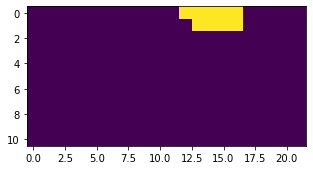

In [225]:
for t in range(17):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [props[10].border[:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

## Properties to image

In [96]:
props_clean = [props[i] for i in df_clean.cell]

In [97]:
img_volume = ps.metrics.prop_to_image(regionprops=props_clean, shape=img.shape, prop='volume')

In [99]:
len(np.unique(img_volume))

5175

In [15]:
len(np.unique(img_volume))

11571

In [ ]:
FILE = "/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/20190404_E1/instance_by_volume.nii.gz"
ni_img = nib.Nifti1Image(img_volume.astype('uint16'), affine=np.eye(4))
nib.save(ni_img, FILE)

In [16]:
esferas = ps.metrics.prop_to_image(regionprops=props_clean, shape=img.shape, prop='inscribed_sphere')

In [103]:
sphericity = ps.metrics.prop_to_image(regionprops=props_clean, shape=img.shape, prop='sphericity')

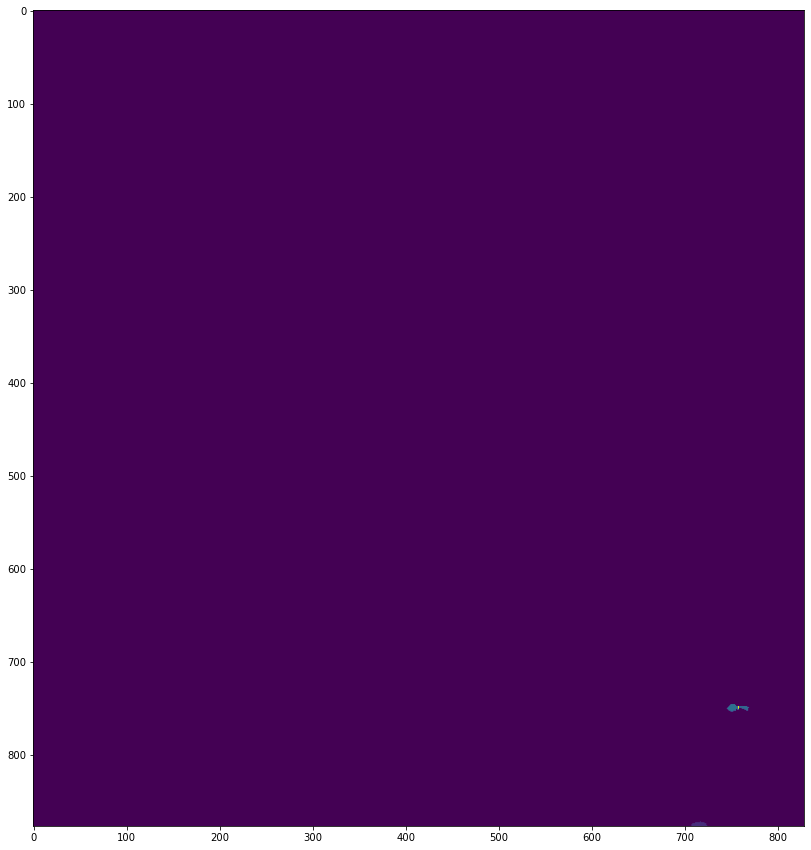

In [106]:
for t in range(52):
    plt.figure(figsize=(15,15)) 
    n = 10*t
    plots = [img_volume[:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

### LABEL LINES --> Centroid

In [9]:
centroids = [p["centroid"] for p in props]
centroids_int = [[round(i) for i in c] for c in centroids]
labels_lines = [lines[c[0],c[1],c[2]] for c in centroids_int]

In [28]:
im_labels = np.zeros(shape=img.shape)
#prop = "volume"
for i, r in enumerate(props):
    mask = r.image
    #temp = mask * r[prop]
    temp = mask * labels_lines[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    im_labels[s] += temp

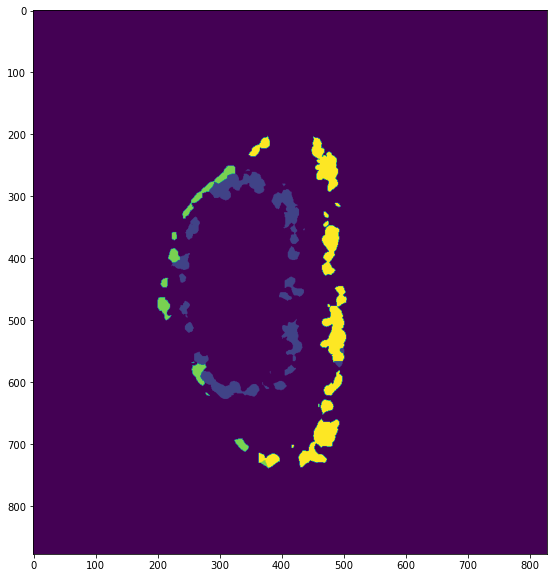

In [167]:
for t in range(52):
    plt.figure(figsize=(10,10)) 
    n = 100 #10*t
    plots = [im_labels[:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break

### LABEL LINES --> si toca alguna line 

In [37]:
[i for i in np.unique(lines[props[3].slices]) if i!= 0]

[4.0, 5.0]

In [10]:
from collections import Counter

In [ ]:
lines[props[1].slices][lines[props[1].slices] != 0]

In [11]:
most_communs = []
for p in props:
    b = Counter(lines[p.slices].flatten())
    if len(list(b))==1: ## si es solo 1, ese es
        m = list(b)[0] 
    else: #si hay varios. coger mayor diff cero
        d = {key:val for key, val in dict(b).items() if key != 0}
        m = max(d, key=d.get)
    most_communs.append(m)

In [298]:
len(most_communs)

11570

In [91]:
np.unique(lines[p.slices].flatten())

array([0.])

In [122]:
b = Counter(lines[props[200].slices].flatten())
b

Counter({0.0: 3656, 4.0: 975, 5.0: 3273})

In [123]:
list(b)

[0.0, 4.0, 5.0]

In [128]:
dict(b)


In [130]:
d

{4.0: 975, 5.0: 3273}

In [129]:
max(d, key=d.get)

5.0

In [116]:
b[0] == 0
len(b)

1

In [112]:
list(b)

[0.0]

In [102]:
b.most_common(1)

[(0.0, 4114)]

In [133]:
im_labels_ = np.zeros(shape=img.shape)
#prop = "volume"
for i, r in enumerate(props):
    mask = r.image
    #temp = mask * r[prop]
    temp = mask * most_communs[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    im_labels_[s] += temp

In [68]:
lines[props[0].slices][lines[props[0].slices] != 0]

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

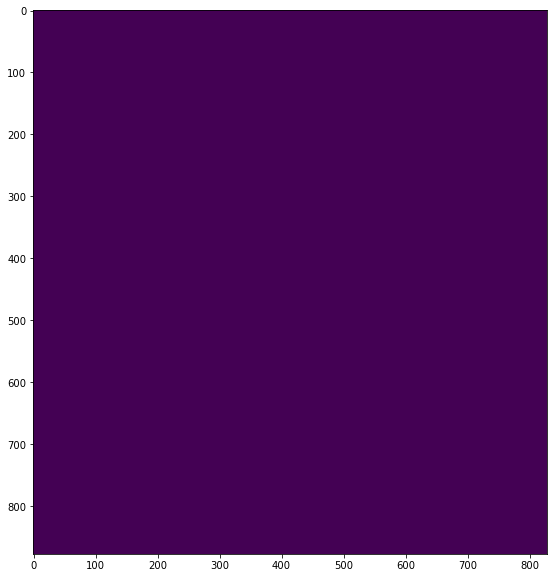

In [134]:
for t in range(52):
    plt.figure(figsize=(10,10)) 
    n = 10*t
    plots = [im_labels_[:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

## COMPARE 

In [148]:
boundaries_img = find_boundaries(img).astype("float64")

In [150]:
np.unique(boundaries_img)

array([0., 1.])

In [149]:
np.unique(lines)

array([ 0.,  1.,  4.,  5.,  6.,  9., 10., 11., 12.])

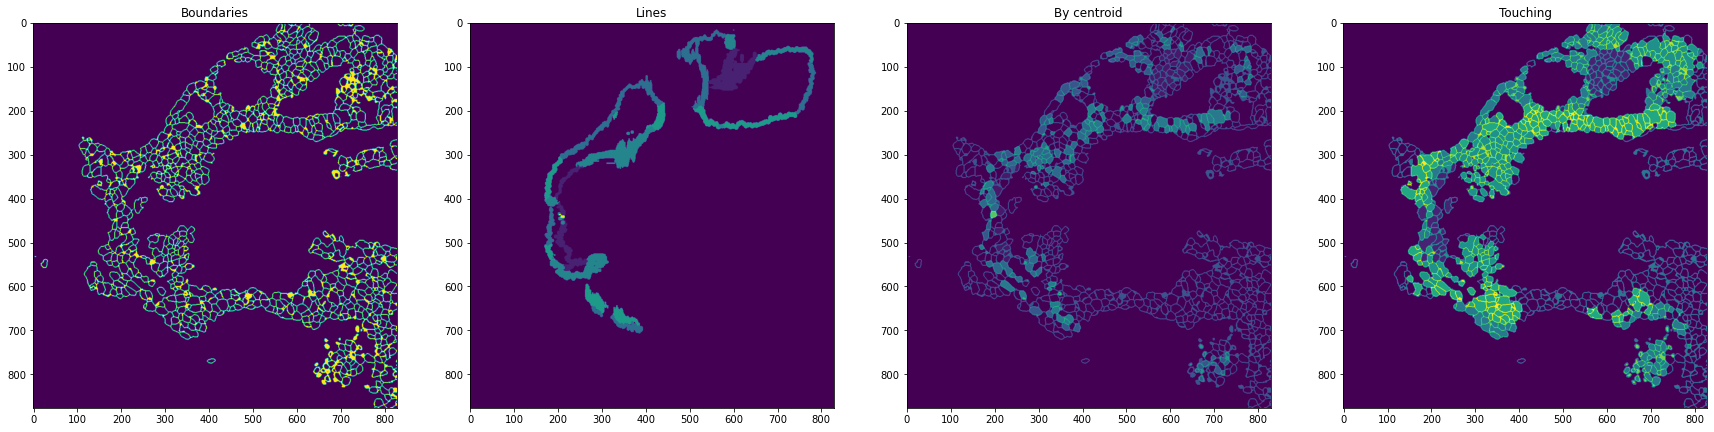

In [170]:
for t in range(52):
    plt.figure(figsize=(30,30)) 
    n = 300 #10*t
    titles = ["Boundaries","Lines", "By centroid", "Touching"]
    plots = [boundaries_img[:,:,n], lines[:,:, n], 
             im_labels[:,:, n]+boundaries_img[:,:,n], 
             im_labels_[:,:, n]+boundaries_img[:,:,n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break

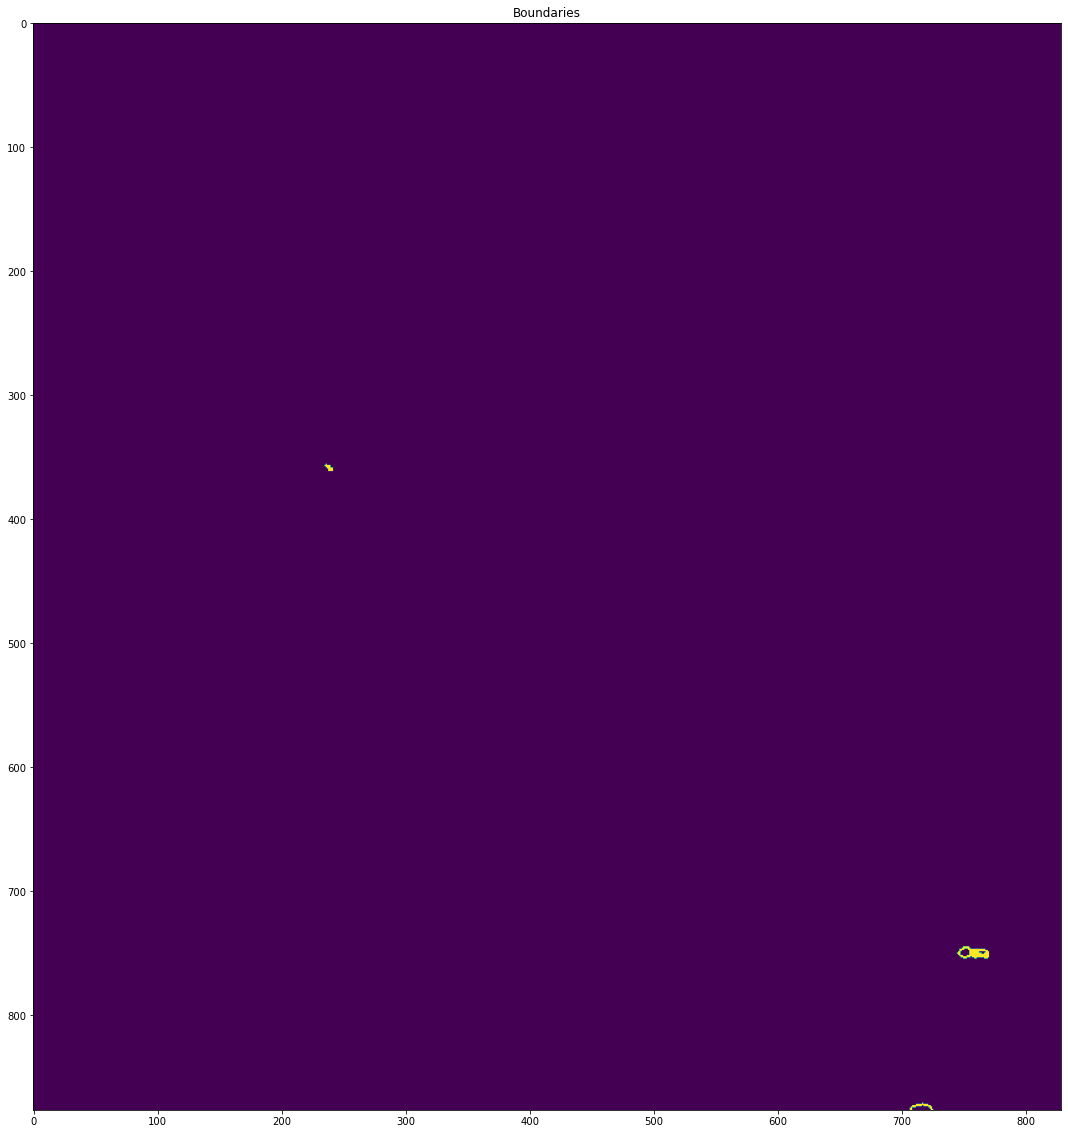

In [171]:
for t in range(52):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    plots = [im_labels_[:,:, n]+boundaries_img[:,:,n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [ ]:
for i, r in enumerate(props):
    mask = r.image
    #temp = mask * r[prop]
    temp = mask * labels_lines[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    boundaries_img[s] += temp

In [161]:
lines[props[23].slices].shape

(23, 21, 25)

In [177]:
[i for i in np.unique(lines[props[23].slices]) if i!=0]

ModeResult(mode=array([4.]), count=array([1]))

In [ ]:
plt.scatter(range(len(props)), sphericities)

## DATAFRAME

In [12]:
volumes = [p.volume for p in props]
sphericities = [p.sphericity for p in props]

In [13]:
df = pd.DataFrame({"cell":range(len(props)),
                "sphericities":sphericities, 
                     "lines":most_communs, 
                  "volumes": volumes})
df.head()

cell  sphericities  lines  volumes
0     0      0.768209    4.0     5857
1     1      0.685783    0.0     3112
2     2      0.905538    0.0     2750
3     3      0.570170    4.0    12027
4     4      0.752515    4.0     2604

In [71]:
# df.to_csv("cell_properties.csv", index=False, header=True)

In [108]:
import plotly.express as px

In [111]:
df_clean[df_clean.lines != 0].groupby("lines").count()

cell  sphericities  volumes  original_labels  VolumeRGB  volumeRGB
lines                                                                    
1.0    3607          3607     3607             3607       3607       3607
4.0    1195          1195     1195             1195       1195       1195
5.0    2378          2378     2378             2378       2378       2378
6.0     458           458      458              458        458        458
10.0      2             2        2                2          2          2
11.0      1             1        1                1          1          1

In [113]:
fig = px.box(df_clean, x="lines", y="volumes",hover_data=["cell"], color="lines" )
fig.show()

## imagen con labels = lines

In [90]:
#https://github.com/PMEAL/porespy/blob/748865e2897c579a533b7378af67816464ba527d/porespy/metrics/_regionprops.py

im = np.zeros(shape=img.shape)
#prop = "volume"
for i, r in enumerate(props):
    mask = r.image
    #temp = mask * r[prop]
    temp = mask * labels_lines[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    im[s] += temp

In [110]:
for i, r in enumerate(props):
    mask = r.image
    #temp = mask * r[prop]
    temp = mask * labels_lines[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    boundaries_img[s] += temp

In [96]:
boundaries_im2 = im + 100*boundaries_im

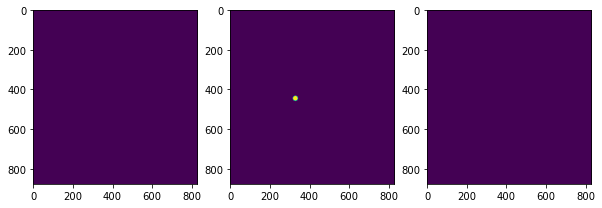

In [93]:
for t in range(52):
    plt.figure(figsize=(10,10)) 
    n = 10*t
    plots = [im[:,:, n], lines[:,:, n], boundaries_img[:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

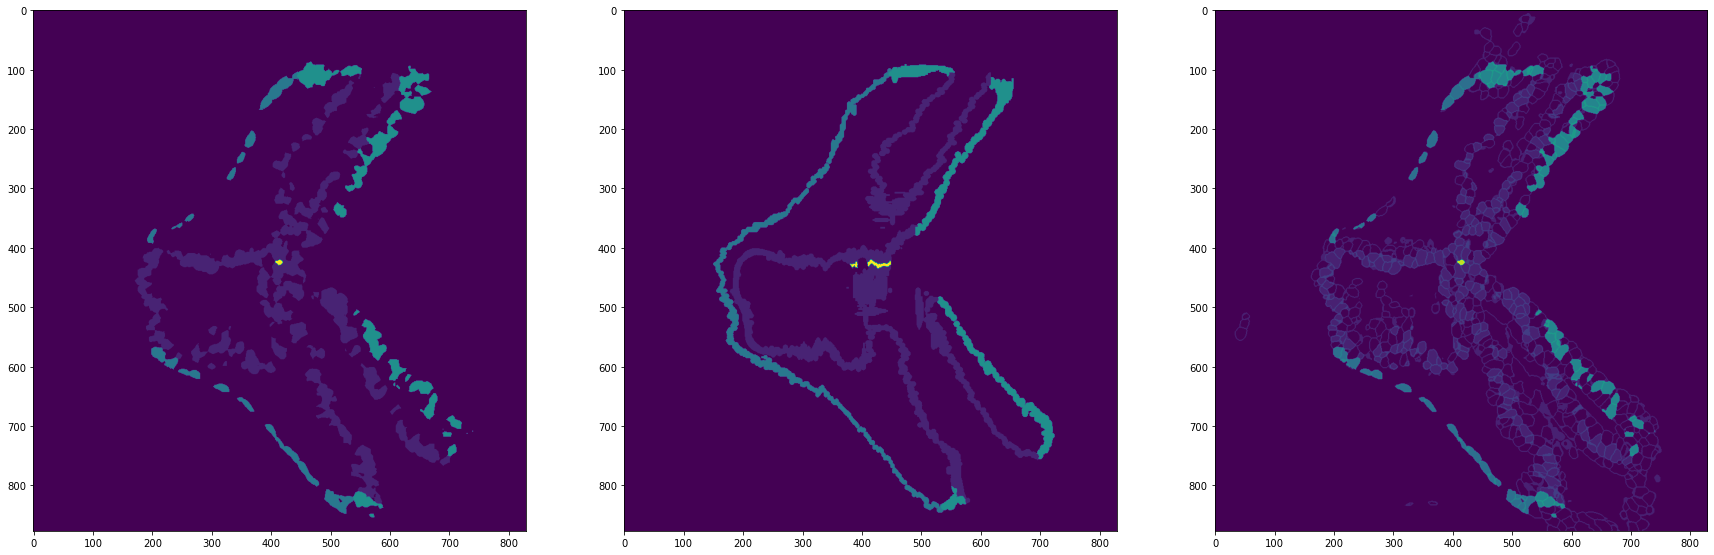

In [115]:
plt.figure(figsize=(30,30)) 
n = 200
plots = [im[:,:, n], lines[:,:, n], boundaries_img[:,:, n]]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])
plt.show()

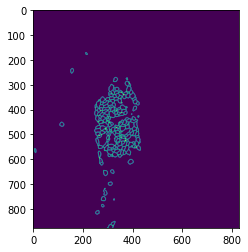

In [104]:
plt.imshow(find_boundaries(img[:,:, 50])) 

In [184]:
# load volumes
volumes

In [18]:
# Volume to colors


In [19]:
IDs = np.unique(imgi)
IDs = np.delete(IDs, 0)

### Compare seg ids vs scikit ids

In [207]:
props[0].label

1

In [229]:
props[3].centroid

(15.848424378481749, 553.6769768021951, 259.9946786397273)

In [233]:
centroids_int[3]

[16, 554, 260]

In [234]:
len(props)

11570

In [244]:
img[centroids_int[3]]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])

#### Una region no necesariamente tiene un solo label - puede ser back /justo este es back y es gigante

In [250]:
np.unique(centros[props[3].slices])

array([0., 1.])

In [252]:
centros = np.zeros(img.shape)
c = centroids_int[3]
centros[c[0],c[1], c[2]] = 1

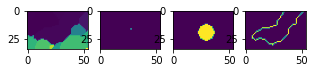

In [271]:
for t in range(25):
    plt.figure(figsize=(5,5)) 
    n = 13 #1*t
    plots = [img[props[3].slices][:,:, n], 
             centros[props[3].slices][:,:, n], 
             props[3].inscribed_sphere[:,:, n], 
            props[3].border[:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)
    break

In [272]:
props[3].volume

12027

In [273]:
np.max(volumes)

102001

In [ ]:
img[props[3].slices]

In [274]:
imgi[props[3].slices]

### Sacar label del centroide

In [20]:
original_labels_centroids = [imgi[c[0],c[1],c[2]] for c in centroids_int]

In [21]:
dict_labels_count = dict(Counter(original_labels_centroids))

In [22]:
df["original_labels"] = original_labels_centroids

In [23]:
df.head()

cell  sphericities  lines  volumes  original_labels
0     0      0.768209    4.0     5857             6057
1     1      0.685783    0.0     3112             4268
2     2      0.905538    0.0     2750             6206
3     3      0.570170    4.0    12027             6450
4     4      0.752515    4.0     2604             7596

In [24]:
df.shape

(11570, 5)

In [26]:
d = {key:val for key, val in dict(dict_labels_count).items() if val > 1}
d

{5115: 2,
 6886: 2,
 6929: 2,
 8836: 2,
 6541: 2,
 10467: 2,
 6725: 2,
 10366: 2,
 11195: 2,
 0: 5,
 11371: 2,
 8475: 2,
 209: 2,
 7232: 2,
 7856: 2,
 11021: 2,
 10638: 2,
 6523: 2,
 5956: 2,
 9652: 2,
 6693: 2,
 7913: 2,
 9404: 2,
 2139: 2,
 3386: 2,
 4414: 2}

In [ ]:
dict()

In [27]:
df_clean = df[df.original_labels != 0]
df_clean.shape

(11565, 5)

In [28]:
df_clean = df_clean.drop_duplicates(subset='original_labels')

In [29]:
df_clean[df_clean.duplicated(['original_labels'])]

Empty DataFrame
Columns: [cell, sphericities, lines, volumes, original_labels]
Index: []

In [307]:
#Â df.groupby("original_labels").count()

In [308]:
len(np.unique(original_labels_centroids)) ### hay labels que se repiten 

11541

In [346]:
#Counter(original_labels_centroids).most_common(100)
props[0].volume

5857

In [512]:
df_clean.shape

(11540, 5)

In [30]:
df_clean[df_clean.original_labels==2]

cell  sphericities  lines  volumes  original_labels
3847  3847      0.711979    0.0      870                2

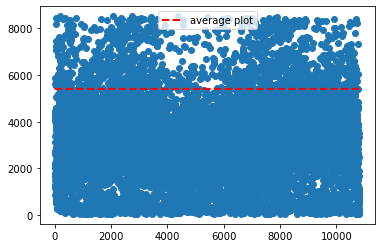

In [81]:
fig, ax = plt.subplots()
x = range(df_clean.shape[0])
y = list(df_clean.volumes)
ax.scatter(x, y)
y_avg = [np.median(x)] * len(x)
ax.plot(x, y_avg, color='red', lw=2, ls='--', label="average plot")

plt.legend(loc=0)
plt.show()

(26, 18, 6)

array([294,  58,   0])

array([294,  58,   0])

array([[294,  71,   0],
       [294,  72,   0],
       [294,  73,   0],
       ...,
       [318,  64,   0],
       [318,  64,   1],
       [319,  61,   0]])

True

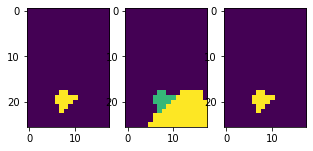

In [417]:
for t in range(6):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [cell_cords_3d[:,:, n], 
             imgi[props[3847].slices][:,:, n],
             props[3847].mask[:,:, n]
            ]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [391]:
#np.where(imgi==cell_id)
m = np.zeros(shape=img.shape)
#prop = "volume"
for i, r in enumerate(props):
    mask = r.image
    #temp = mask * r[prop]
    temp = mask * labels_lines[i]
    s = ps.tools.bbox_to_slices(r.bbox)
    im[s] += temp

In [368]:
props[3847].mask.shape

(26, 18, 6)

In [378]:
imgi[props[3847].slices].shape

(26, 18, 6)

In [342]:
x = np.asarray(np.where(imgi==cell_id))

In [344]:
x.shape

(3, 870)

In [472]:
cell_cords_aux.min(axis=0)

array([294,  58,   0])

In [ ]:
import scipy.ndimage as spim

In [ ]:
regions = spim.label(pred_mem)[0] 

In [ ]:
def pixelcount(regionmask):
    print(regionmask)
    return np.sum(regionmask)

In [ ]:
propsw = regionprops(img, extra_properties=(pixelcount,))

In [ ]:
props[0].mask.shape

In [ ]:
props[0].bbox_volume

## NUCLEI

In [ ]:
"/Users/dvarelat/Documents/MASTER/TFM/methods/mycellpose/results/20190401_E2_DAPI_CardiacRegion_0.5_NORM__MASK_ZXY.nii.gz"

# LABELS lines


In [122]:
names = ["background", "myocardium", "embryo", "pocket", "somatic", "splanchnic", 
 "proximal", "aorta", "lumen", "middle plane", "keep dorsal open myo", 
 "keep dorsal open spl", "notochord"]
abb = ["BG", "myo", "emb", "poc", "som", "spl", "pro", "aor", "lum", "mp", "kdo_myo", "mdo_spl", "not"]
numb = [i for i in range(13)]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [125]:
labels  = pd.DataFrame({"label":numb,
                "name":names, 
                     "short":abb})
labels.to_csv("/Users/dvarelat/Documents/MASTER/TFM/DATA/LINES/lines_labels.csv", index=False, header=True)